In [43]:
# Importing the necessary module!

import numpy as np
import pandas as pd

In [44]:

# Read the first CSV file
df1 = pd.read_csv('Heart_Disease_train.csv')

# Read the second CSV file
df2 = pd.read_csv('Heart_Disease_test.csv')

# Merge the two dataframes vertically
merged_df = pd.concat([df1, df2])

# Save the merged dataframe as a new CSV file
merged_df.to_csv('Heart_Disease.csv', index=False)

In [45]:
merged_df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,59,Male,1,170,NaN,0,2,159,0,0.2,2,0,7,Presence
1,62,Male,2,128,NaN,1,2,140,0,0.0,1,0,3,Absence
2,76,Female,3,140,197.0,0,1,116,0,1.1,2,0,3,Absence
3,38,Male,1,120,231.0,0,0,182,1,3.8,2,0,7,Presence
4,67,Male,4,125,NaN,1,0,163,0,0.2,2,2,7,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,60,Male,4,130,206.0,0,2,132,1,2.4,2,2,7,Presence
77,54,Male,3,120,258.0,0,2,147,0,0.4,2,0,7,Absence
78,58,Male,4,128,216.0,0,2,131,1,2.2,2,3,7,Presence
79,56,Male,1,120,193.0,0,2,162,0,1.9,2,0,7,Absence


In [46]:
# Converting categorical variables into dummies/indicator variables
from sklearn.preprocessing import OrdinalEncoder
columns_to_encode = ['Sex', 'Heart Disease']
ordinal_encoder = OrdinalEncoder()
merged_df[columns_to_encode] = ordinal_encoder.fit_transform(merged_df[columns_to_encode])

In [47]:
merged_df


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,59,1.0,1,170,NaN,0,2,159,0,0.2,2,0,7,1.0
1,62,1.0,2,128,NaN,1,2,140,0,0.0,1,0,3,0.0
2,76,0.0,3,140,197.0,0,1,116,0,1.1,2,0,3,0.0
3,38,1.0,1,120,231.0,0,0,182,1,3.8,2,0,7,1.0
4,67,1.0,4,125,NaN,1,0,163,0,0.2,2,2,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,60,1.0,4,130,206.0,0,2,132,1,2.4,2,2,7,1.0
77,54,1.0,3,120,258.0,0,2,147,0,0.4,2,0,7,0.0
78,58,1.0,4,128,216.0,0,2,131,1,2.2,2,3,7,1.0
79,56,1.0,1,120,193.0,0,2,162,0,1.9,2,0,7,0.0


In [48]:
# Handle missing values in a dataset by replacing them with a specified strategy.
from sklearn.impute import SimpleImputer

columns = merged_df.columns
impute = SimpleImputer()
merged_df_imputed = pd.DataFrame(impute.fit_transform(merged_df))
merged_df_imputed.columns=columns
merged_df_imputed.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,59.0,1.0,1.0,170.0,251.155102,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,1.0
1,62.0,1.0,2.0,128.0,251.155102,1.0,2.0,140.0,0.0,0.0,1.0,0.0,3.0,0.0
2,76.0,0.0,3.0,140.0,197.000000,0.0,1.0,116.0,0.0,1.1,2.0,0.0,3.0,0.0
3,38.0,1.0,1.0,120.0,231.000000,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1.0
4,67.0,1.0,4.0,125.0,251.155102,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0,1.0


In [49]:

# Separating the training set and test set
from sklearn.model_selection import train_test_split

X = merged_df_imputed.drop('Heart Disease',axis=1)
y = merged_df_imputed['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [50]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
print(X_train)

[[ 2.410375    0.74965557  0.87015508 ... -0.98889179  2.38919354
  -0.86061965]
 [ 0.11066866  0.74965557 -1.25190054 ... -0.98889179 -0.71785402
  -0.86061965]
 [ 0.32968831  0.74965557  0.87015508 ...  0.62231983  1.35351102
   1.21144549]
 ...
 [ 1.31527674  0.74965557  0.87015508 ...  0.62231983  2.38919354
  -0.86061965]
 [ 0.32968831  0.74965557 -1.25190054 ...  0.62231983 -0.71785402
  -0.86061965]
 [ 1.09625709  0.74965557  0.87015508 ... -0.98889179 -0.71785402
   1.21144549]]


In [52]:
X_test

array([[-7.65409945e-01,  7.49655568e-01, -1.25190054e+00, ...,
         2.23353146e+00, -7.17854021e-01,  1.21144549e+00],
       [ 5.48707962e-01,  7.49655568e-01, -1.90872728e-01, ...,
         6.22319835e-01, -7.17854021e-01, -8.60619646e-01],
       [ 1.20576692e+00,  7.49655568e-01,  8.70155084e-01, ...,
        -9.88891792e-01,  3.17828498e-01, -8.60619646e-01],
       ...,
       [ 1.15883413e-03, -1.33394594e+00, -1.25190054e+00, ...,
         6.22319835e-01, -7.17854021e-01, -8.60619646e-01],
       [-1.97001803e+00,  7.49655568e-01, -1.90872728e-01, ...,
         2.23353146e+00, -7.17854021e-01, -8.60619646e-01],
       [-4.36880468e-01,  7.49655568e-01, -1.90872728e-01, ...,
        -9.88891792e-01,  3.17828498e-01,  1.21144549e+00]])

In [53]:
# importing Decision Tree Classifier via sklean with entropy

from sklearn.tree import DecisionTreeClassifier

dtree_etp = DecisionTreeClassifier(criterion='entropy',random_state=1)
dtree_etp.fit(X_train,y_train)
predictions_entropy = dtree_etp.predict(X_test)

In [54]:
# Score the model
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix (y_test,predictions_entropy))
print(accuracy_score(y_test,predictions_entropy))

print(precision_score(y_test, predictions_entropy))
print(recall_score(y_test, predictions_entropy))
print(f1_score(y_test, predictions_entropy))

[[33 14]
 [ 8 26]]
0.7283950617283951
0.65
0.7647058823529411
0.7027027027027027


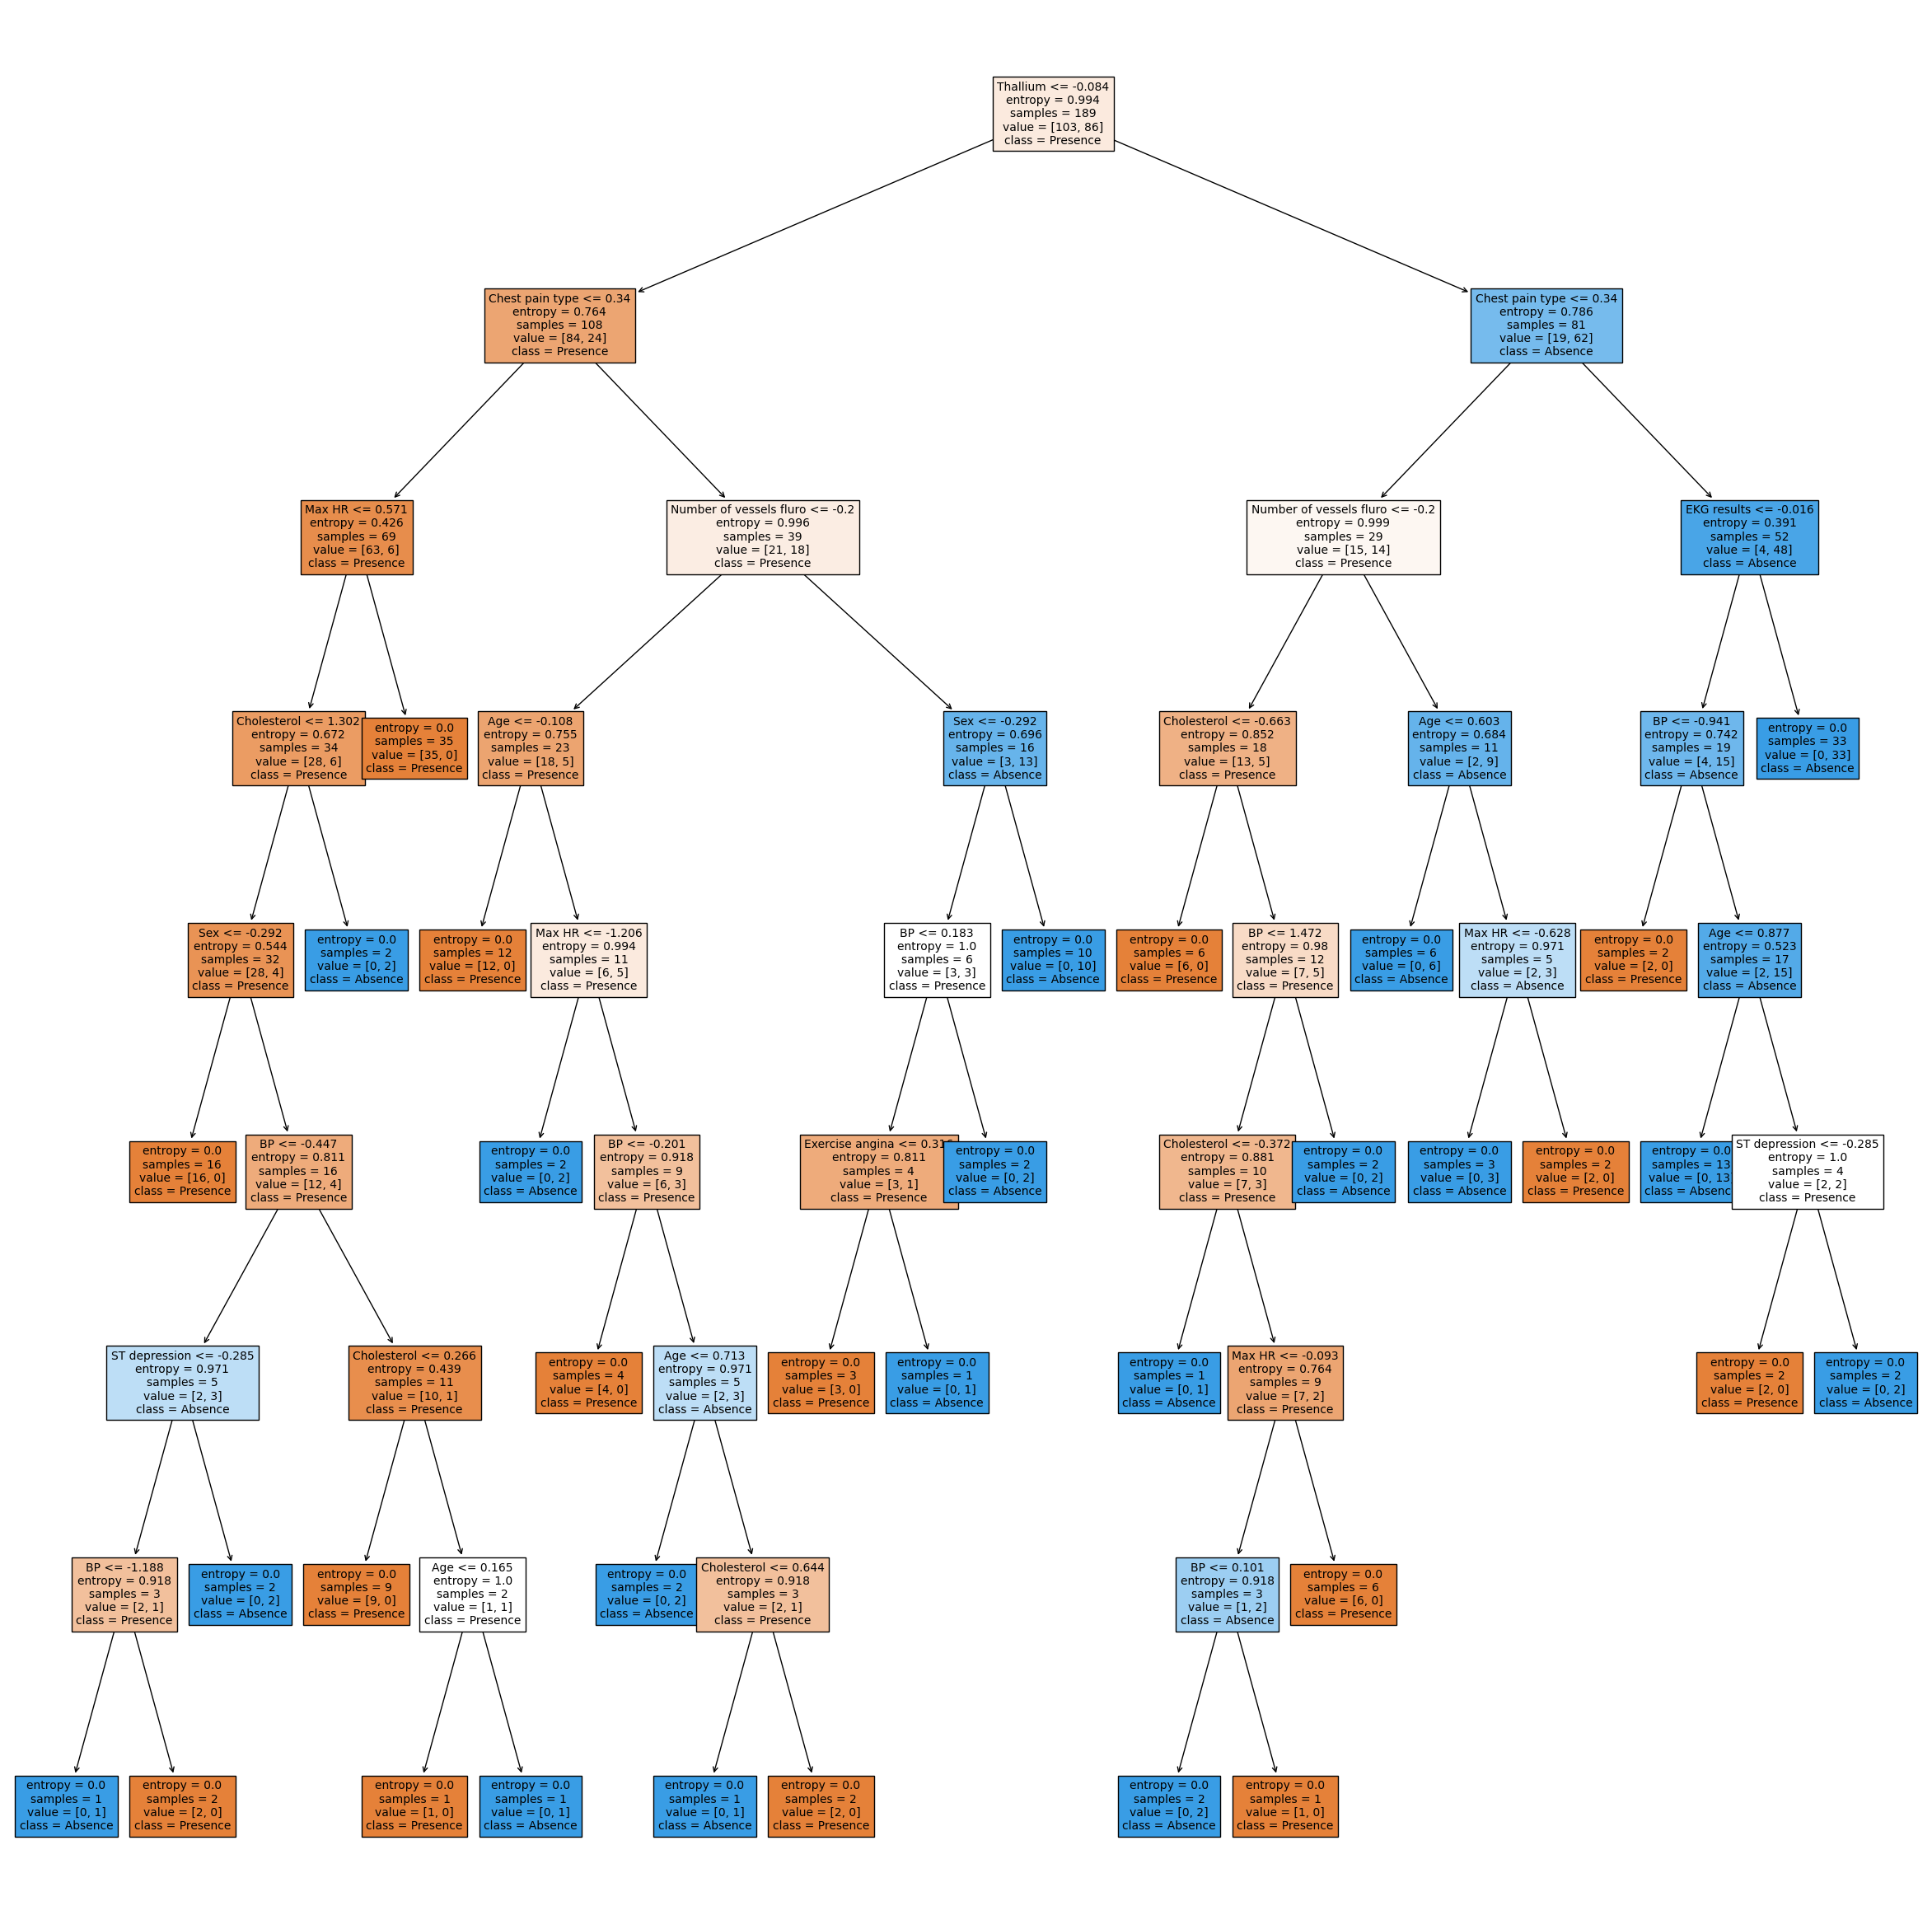

In [55]:
#Visualising the decision tree diagram
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,30))



a = plot_tree(dtree_etp, feature_names=list(merged_df.columns), fontsize=10, filled=True, 
              class_names=['Presence', 'Absence'])

In [56]:
plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [57]:
list(merged_df.columns)

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

In [58]:
# importing Decision Tree Classifier via sklean with gini

from sklearn.tree import DecisionTreeClassifier

dtree_gn = DecisionTreeClassifier(criterion='gini',random_state=2)
dtree_gn.fit(X_train,y_train)
predictions_gini = dtree_gn.predict(X_test)

In [59]:
# Score the model
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
print(confusion_matrix (y_test,predictions_gini))
print(accuracy_score(y_test,predictions_gini))
print(precision_score(y_test, predictions_gini))
print(recall_score(y_test, predictions_gini))
print(f1_score(y_test, predictions_gini))

[[34 13]
 [ 8 26]]
0.7407407407407407
0.6666666666666666
0.7647058823529411
0.7123287671232877


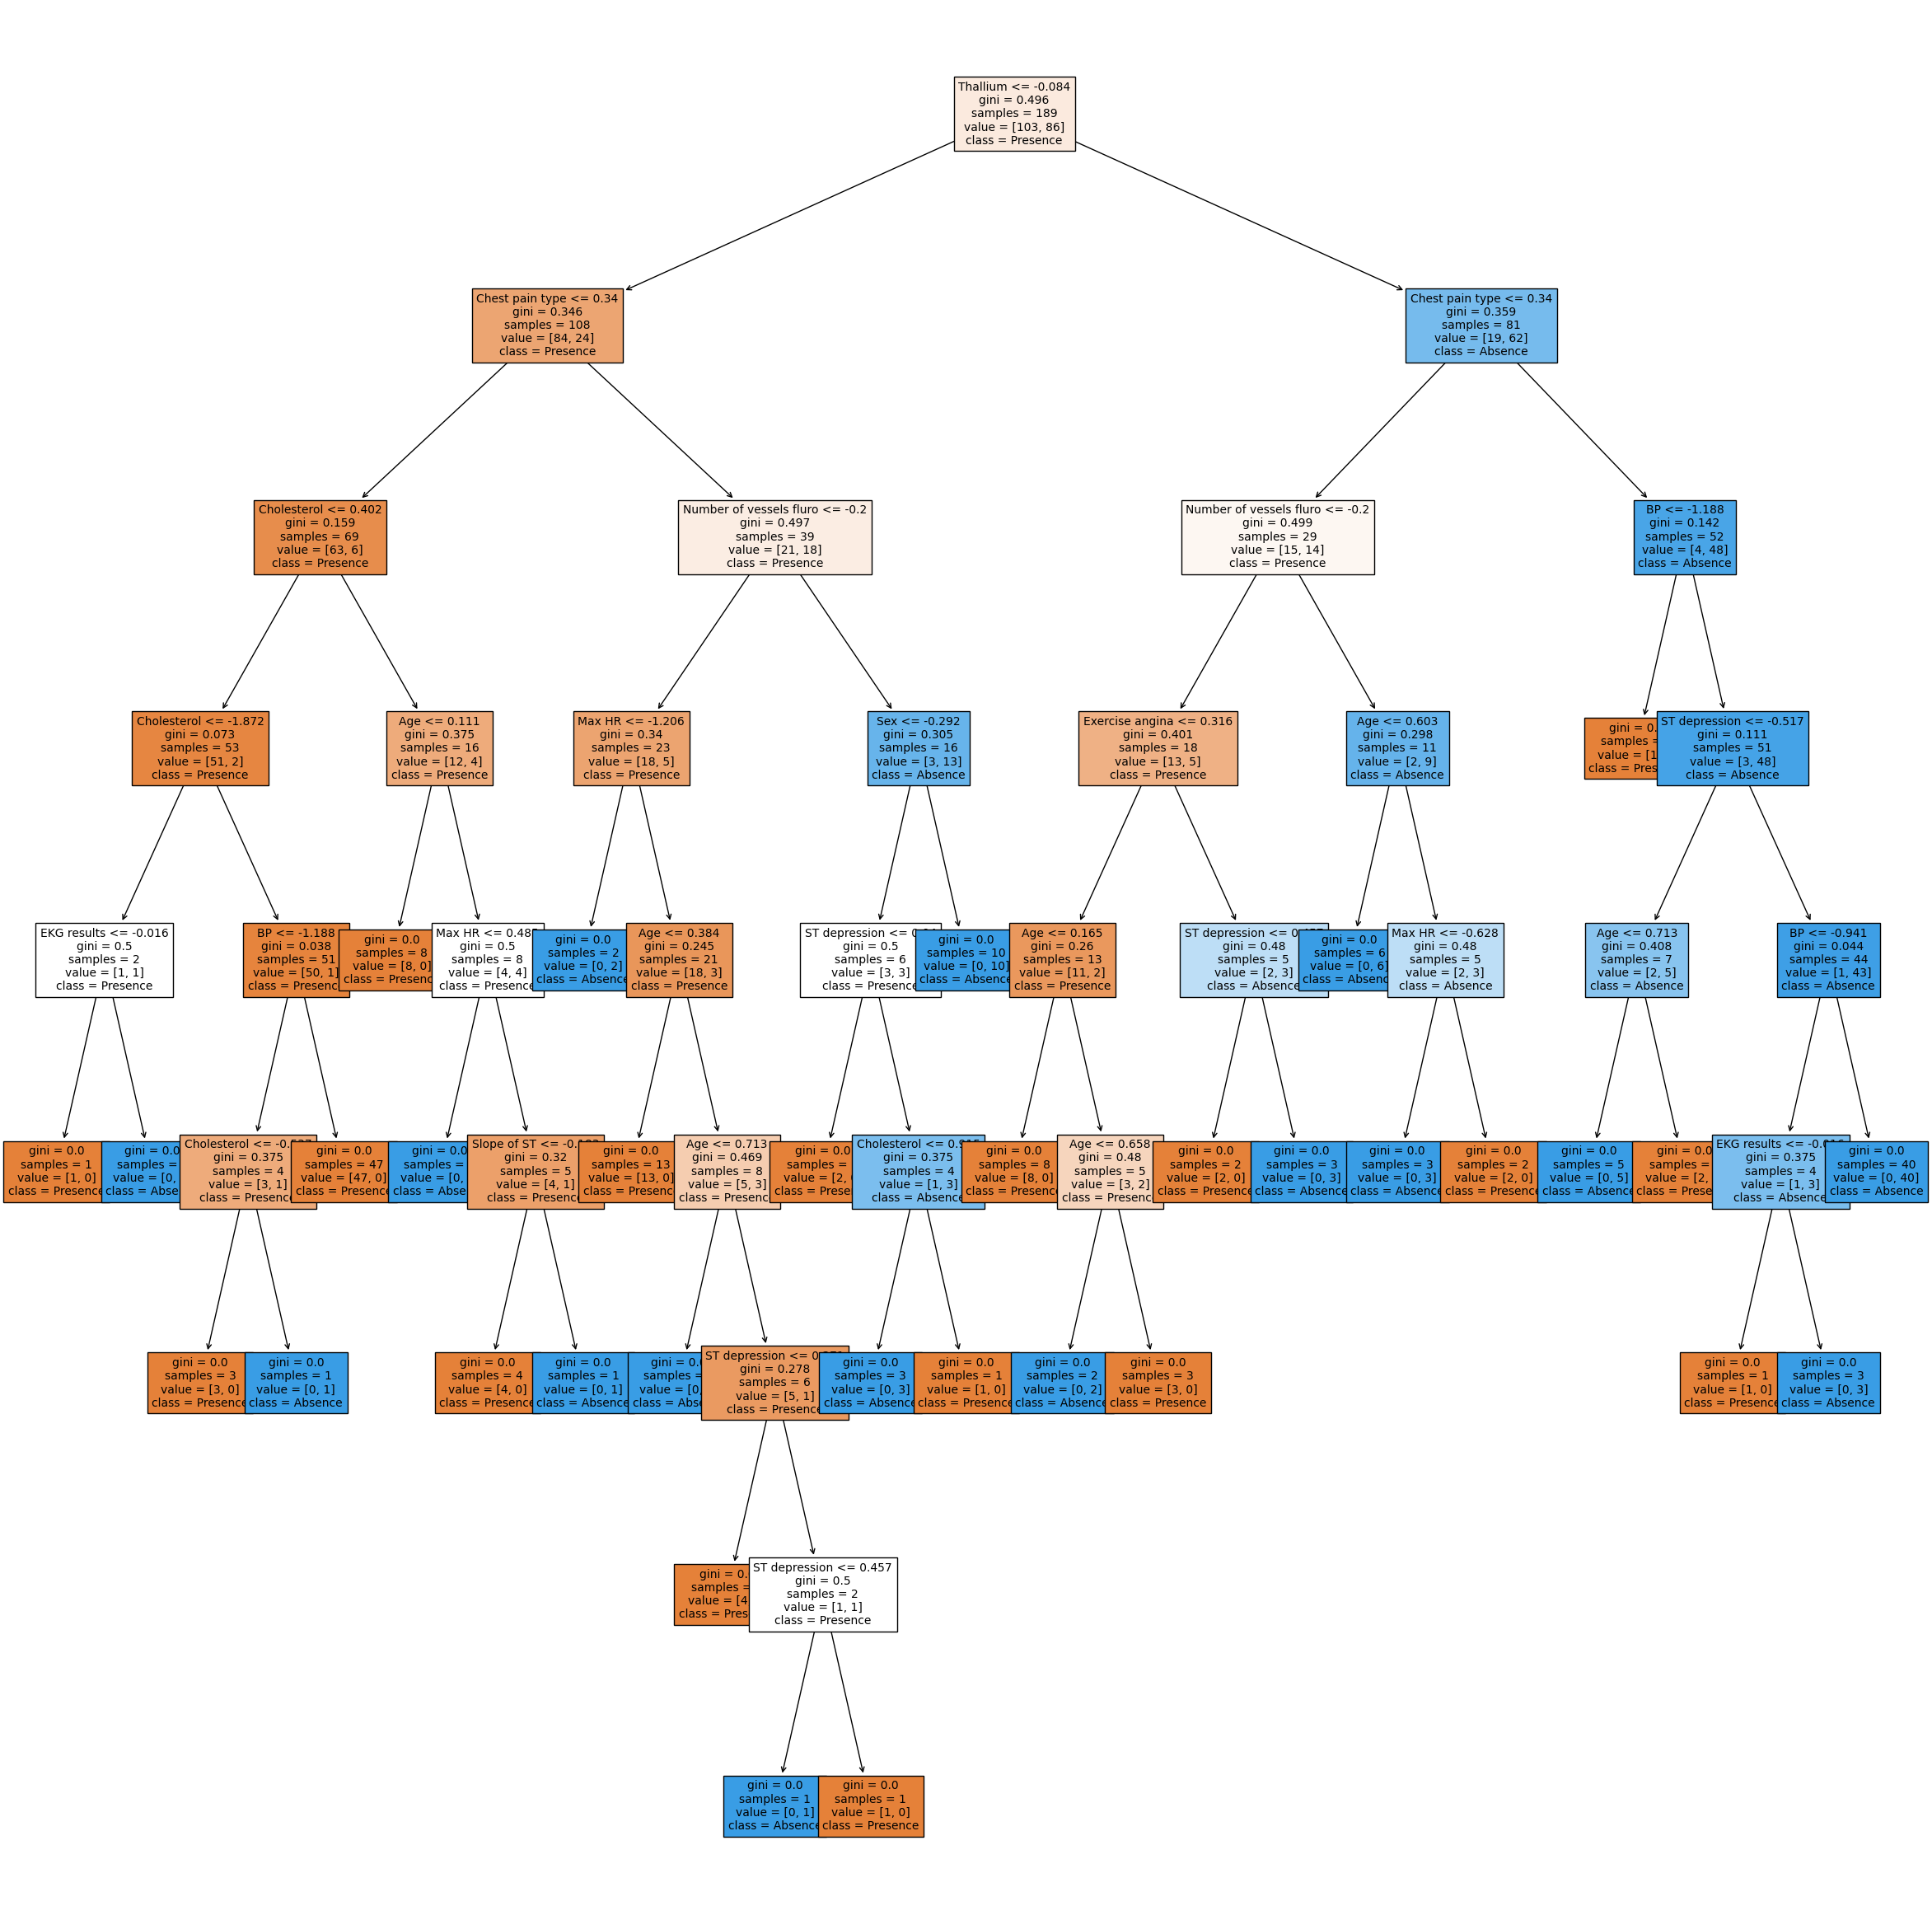

In [65]:
#Visualising the decision tree diagram gini
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,30))



a = plot_tree(dtree_gn, feature_names=list(merged_df.columns), fontsize=10, filled=True, 
              class_names=['Presence', 'Absence'])

In [61]:
def best_parameters(criterion):
    info = {'Accuracy':[],
            'Precision':[],
            'Recall':[],
            'F1_score':[]}
    for i in range(1,merged_df.shape[1]):
        model = DecisionTreeClassifier(criterion=criterion, max_depth=i, random_state=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        info['Accuracy'].append(accuracy_score(y_test, y_pred))
        info['Precision'].append(precision_score(y_test, y_pred))
        info['Recall'].append(recall_score(y_test, y_pred))
        info['F1_score'].append(f1_score(y_test, y_pred))
    print(pd.DataFrame(info))
        

In [62]:
best_parameters('gini')

    Accuracy  Precision    Recall  F1_score
0   0.740741   0.675676  0.735294  0.704225
1   0.753086   0.769231  0.588235  0.666667
2   0.814815   0.771429  0.794118  0.782609
3   0.814815   0.771429  0.794118  0.782609
4   0.802469   0.764706  0.764706  0.764706
5   0.728395   0.650000  0.764706  0.702703
6   0.753086   0.675000  0.794118  0.729730
7   0.728395   0.650000  0.764706  0.702703
8   0.728395   0.650000  0.764706  0.702703
9   0.728395   0.650000  0.764706  0.702703
10  0.728395   0.650000  0.764706  0.702703
11  0.728395   0.650000  0.764706  0.702703
12  0.728395   0.650000  0.764706  0.702703


In [63]:
best_parameters('entropy')

    Accuracy  Precision    Recall  F1_score
0   0.740741   0.675676  0.735294  0.704225
1   0.753086   0.769231  0.588235  0.666667
2   0.827160   0.777778  0.823529  0.800000
3   0.790123   0.742857  0.764706  0.753623
4   0.753086   0.705882  0.705882  0.705882
5   0.740741   0.666667  0.764706  0.712329
6   0.753086   0.684211  0.764706  0.722222
7   0.753086   0.675000  0.794118  0.729730
8   0.753086   0.675000  0.794118  0.729730
9   0.753086   0.675000  0.794118  0.729730
10  0.753086   0.675000  0.794118  0.729730
11  0.753086   0.675000  0.794118  0.729730
12  0.753086   0.675000  0.794118  0.729730
